In [1]:
!pip install alpha_vantage

In [8]:
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
import requests
import pandas as pd

In [52]:
import requests
import pandas as pd
from sklearn.ensemble import IsolationForest

# Replace YOUR_API_KEY with your Alpha Vantage API key
api_key = '8Y2JY7EO6Q31JLNG'

# Specify the function and parameters for the API request
function = 'TIME_SERIES_DAILY_ADJUSTED'
symbol = 'TTE'
outputsize = 'full'

# Construct the API URL
url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize={outputsize}&apikey={api_key}'

# Send the API request and store the response in a variable
response = requests.get(url)

# Convert the response to a dictionary
data = response.json()

# Access the stock market data from the dictionary
time_series = data['Time Series (Daily)']

# Create a pandas DataFrame from the stock market data
df = pd.DataFrame.from_dict(time_series, orient='index')
df.to_csv(f'./data_alpha/stock_market_data_{symbol}.csv')


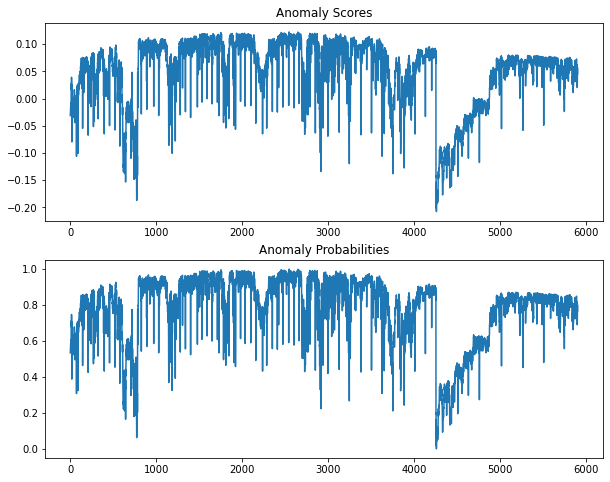

In [58]:
df = pd.read_csv(f'./data_alpha/stock_market_data_TTE.csv', index_col=0)

# Convert the DataFrame index to datetime objects
df.index = pd.to_datetime(df.index)


# Define a function for anomaly detection
def detect_anomalies(df, algorithm):
    # Train the anomaly detection model
    algorithm.fit(df)

    # Predict the anomaly score for each data point
    anomaly_scores = algorithm.decision_function(df)

    # Convert the anomaly scores to a probability distribution
    min_anomaly_score = min(anomaly_scores)
    max_anomaly_score = max(anomaly_scores)
    anomaly_probabilities = (anomaly_scores - min_anomaly_score) / (max_anomaly_score - min_anomaly_score)

    # Return the anomaly scores and probabilities
    return anomaly_scores, anomaly_probabilities


# Perform anomaly detection on the data using the isolation forest algorithm
algorithm = IsolationForest(n_estimators=100)
anomaly_scores, anomaly_probabilities = detect_anomalies(df, algorithm)

# # Visualize the anomaly scores and probabilities
# st.subheader("Anomaly Scores")
# st.line_chart(anomaly_scores)

# st.subheader("Anomaly Probabilities")
# st.line_chart(anomaly_probabilities)


# Visualize the anomaly scores and probabilities
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(anomaly_scores)
ax[0].set_title("Anomaly Scores")
ax[1].plot(anomaly_probabilities)
ax[1].set_title("Anomaly Probabilities")
plt.show()

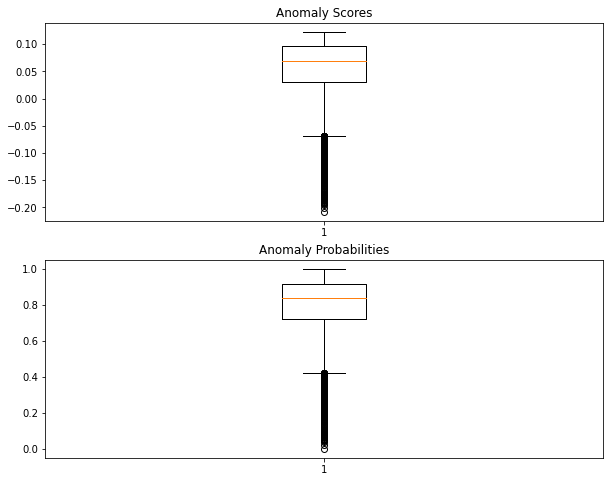

In [59]:
# Visualize the anomaly scores and probabilities using boxplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].boxplot(anomaly_scores)
axs[0].set_title("Anomaly Scores")
axs[1].boxplot(anomaly_probabilities)
axs[1].set_title("Anomaly Probabilities")
plt.show()

# This will create two subplots, each containing a boxplot of the anomaly scores or probabilities.
# Boxplots are useful for visualizing distributions of data, as they show the median, quartiles,
# and outliers of a dataset. In this case, we can use them to get a sense of the range and spread
# of the anomaly scores and probabilities.

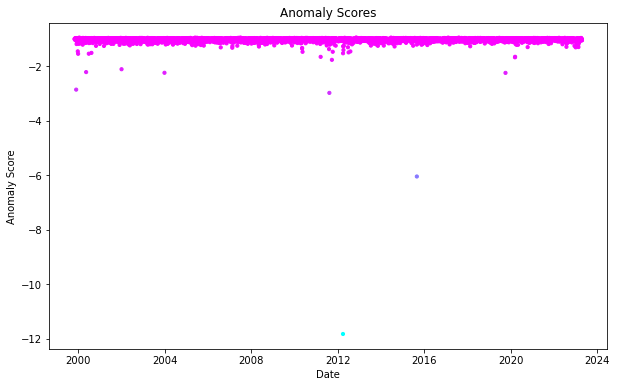

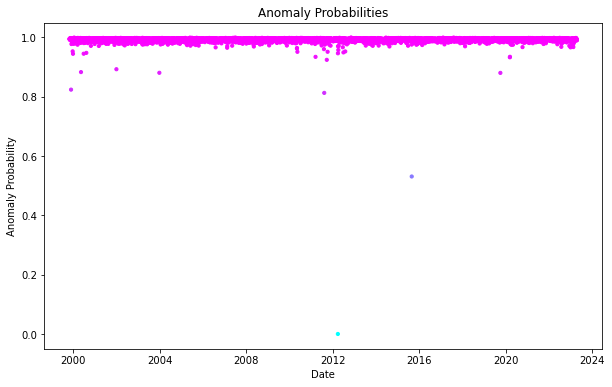

In [62]:
import matplotlib.pyplot as plt

# Scatter plot of anomaly scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df.index, anomaly_scores, s=10, c=anomaly_scores, cmap='cool')
ax.set_title("Anomaly Scores")
ax.set_xlabel("Date")
ax.set_ylabel("Anomaly Score")
plt.show()

# Scatter plot of anomaly probabilities
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df.index, anomaly_probabilities, s=10, c=anomaly_probabilities, cmap='cool')
ax.set_title("Anomaly Probabilities")
ax.set_xlabel("Date")
ax.set_ylabel("Anomaly Probability")
plt.show()


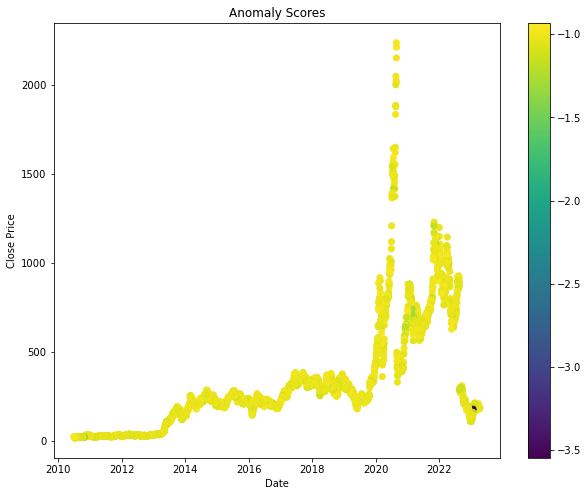

In [63]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Read the data from a CSV file
df = pd.read_csv(f'./data_alpha/stock_market_data_TSLA.csv', index_col=0)

# Convert the DataFrame index to datetime objects
df.index = pd.to_datetime(df.index)

# Define a function for anomaly detection
def detect_anomalies(df, algorithm):
    # Train the anomaly detection model
    algorithm.fit(df)

    # Predict the anomaly score for each data point
    anomaly_scores = algorithm.negative_outlier_factor_

    # Convert the anomaly scores to a probability distribution
    min_anomaly_score = min(anomaly_scores)
    max_anomaly_score = max(anomaly_scores)
    anomaly_probabilities = (anomaly_scores - min_anomaly_score) / (max_anomaly_score - min_anomaly_score)

    # Return the anomaly scores and probabilities
    return anomaly_scores, anomaly_probabilities

# Perform anomaly detection on the data using the LOF algorithm
algorithm = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
anomaly_scores, anomaly_probabilities = detect_anomalies(df, algorithm)

# Visualize the anomaly scores using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df.index, df['4. close'], c=anomaly_scores, cmap='viridis')
plt.colorbar()
plt.title("Anomaly Scores")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()
